지금까지는 일반적인 인공신경망, Dense(조밀 신경말)<br>
앞으로 할 것은 CNN(Convolutional Neural Networks)-> 영상에 특화된 알고리즘<br>
https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten # 이미지를 28 * 28 을 한 줄((784)로 해주는 함수
from tensorflow.keras import datasets # 이미 train, test 가 나눠져 있다.
from keras.utils import np_utils

In [13]:
(X_train, Y_train), (X_test, Y_test) = datasets.fashion_mnist.load_data()
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [14]:
label = ['T-shirt', 'trouser', 'pullover', 'dress', 'coat',
         'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

In [ ]:
my_sample = np.random.randint(60000)
plt.imshow(X_train[my_sample], cmap = 'gray')
plt.show()
print(Y_train[my_sample]) # Y 값 one hot, scailing
print(X_train[my_sample]) # 이미지는 각자의 픽셀의 값을 숫자로 나타낸 것

In [16]:
y_train = np_utils.to_categorical(Y_train) #ont hot을 자동으로 해주는 함수, to_categorical, OneHotEncoder, get_dummies 
y_test = np_utils.to_categorical(Y_test)
print(Y_train[5000])
print(y_train[5000])

4
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [ ]:
x_train = X_train / 255 # MinMaxScaler
x_test = X_test / 255
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)
print(x_train.shape)
print(x_train[0])
print(x_test.shape)
print(x_test[0])
# reshape을 하지 않고 이미지 그래도 들어간다

In [19]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), input_shape=(28, 28,1), padding = 'same', activation = 'relu')) #padding = 'same' 입력이미지와 출력 이미지의 크기가 같다 28 * 28, 32=>출력계수(필터의 개수, 다양한 필터 적용) 필터를 적용한 이미지가 32개
model.add(MaxPool2D(padding = 'same', pool_size = (2,2))) # 2 *2의 필터 안에서 가장 큰 값만 남긴다, 2칸씩 이동, 칸이 맞지 않아 부족할 경우 버린다, padding = 'same'을 넣으면 추가한다. 14 * 14
model.add(Conv2D(32, kernel_size = (3,3), padding = 'same', activation = 'relu')) #14*14, 32=>출력계수(필터의 개수, 다양한 필터 적용) 3*3의 필터 세트가 32개 존재 각각의 이미지에 세트가 만들어져 세트끼리만 적용(첫 번째 이미지 - 첫 번째 필터) 
# 그후 같은 위치의 픽셀 값을 더해서 하나의 이미지 완성, 그런 이미지가 32개 필요-> 3*3의 필터가 32개가 32개 필요
model.add(MaxPool2D(padding = 'same', pool_size = (2,2)))# 7*7
model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [20]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy',
              metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1568)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [21]:
fit_hist = model.fit(x_train, y_train, batch_size=128, epochs = 20, validation_split = 0.2, verbose = 1)

Epoch 1/20
375/375 [==============================] - 5s 12ms/step - loss: 0.5505 - accuracy: 0.8039 - val_loss: 0.3867 - val_accuracy: 0.8662
Epoch 2/20
375/375 [==============================] - 4s 10ms/step - loss: 0.3563 - accuracy: 0.8740 - val_loss: 0.3568 - val_accuracy: 0.8744
Epoch 3/20
375/375 [==============================] - 4s 11ms/step - loss: 0.3097 - accuracy: 0.8891 - val_loss: 0.3336 - val_accuracy: 0.8771
Epoch 4/20
375/375 [==============================] - 4s 12ms/step - loss: 0.2778 - accuracy: 0.9001 - val_loss: 0.2953 - val_accuracy: 0.8929
Epoch 5/20
375/375 [==============================] - 6s 17ms/step - loss: 0.2557 - accuracy: 0.9065 - val_loss: 0.2791 - val_accuracy: 0.8992
Epoch 6/20
375/375 [==============================] - 5s 12ms/step - loss: 0.2380 - accuracy: 0.9123 - val_loss: 0.2704 - val_accuracy: 0.9041
Epoch 7/20
375/375 [==============================] - 4s 10ms/step - loss: 0.2241 - accuracy: 0.9181 - val_loss: 0.2491 - val_accuracy: 0.9070

In [22]:
score = model.evaluate(x_test, y_test, verbose = 0)
print('Final test set accurecy', score[1])

Final test set accurecy 0.9147999882698059


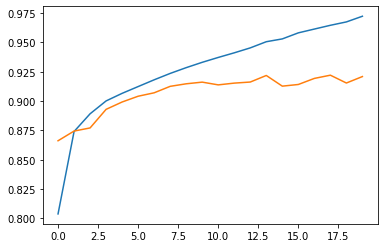

In [23]:
plt.plot(fit_hist.history['accuracy'])
plt.plot(fit_hist.history['val_accuracy'])
plt.show()

2
pullover
[[3.3756041e-03 1.8355622e-06 9.9146187e-01 1.5420969e-06 4.9312576e-03
  3.5893910e-09 1.3352293e-04 4.5765107e-09 9.4431518e-05 2.4399633e-09]]
pullover


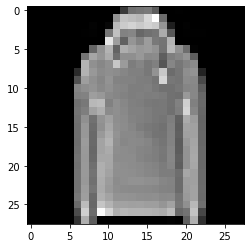

In [25]:
my_sample = np.random.randint(10000)
plt.imshow(X_test[my_sample], cmap = 'gray')
print(Y_test[my_sample])
print(label[Y_test[my_sample]])
pred = model.predict(x_test[my_sample].reshape(-1, 28, 28, 1))
print(pred)
print(label[np.argmax(pred)])

지금까지는 일반적인 인공신경망, Dense(조밀 신경말)<br>
앞으로 할 것은 CNN(Convolutional Neural Networks)-> 영상에 특화된 알고리즘


https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53